In [1]:
!pip install transformers torch torchvision pillow

In [6]:
!pip install transformers torch torchvision pillow datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


**object detection & counting using LLM**

In [1]:
!pip install ultralytics transformers sentencepiece accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 


image 1/1 /content/istockphoto-18.jpg: 448x640 1 banana, 2 apples, 6 oranges, 13.8ms
Speed: 3.1ms preprocess, 13.8ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


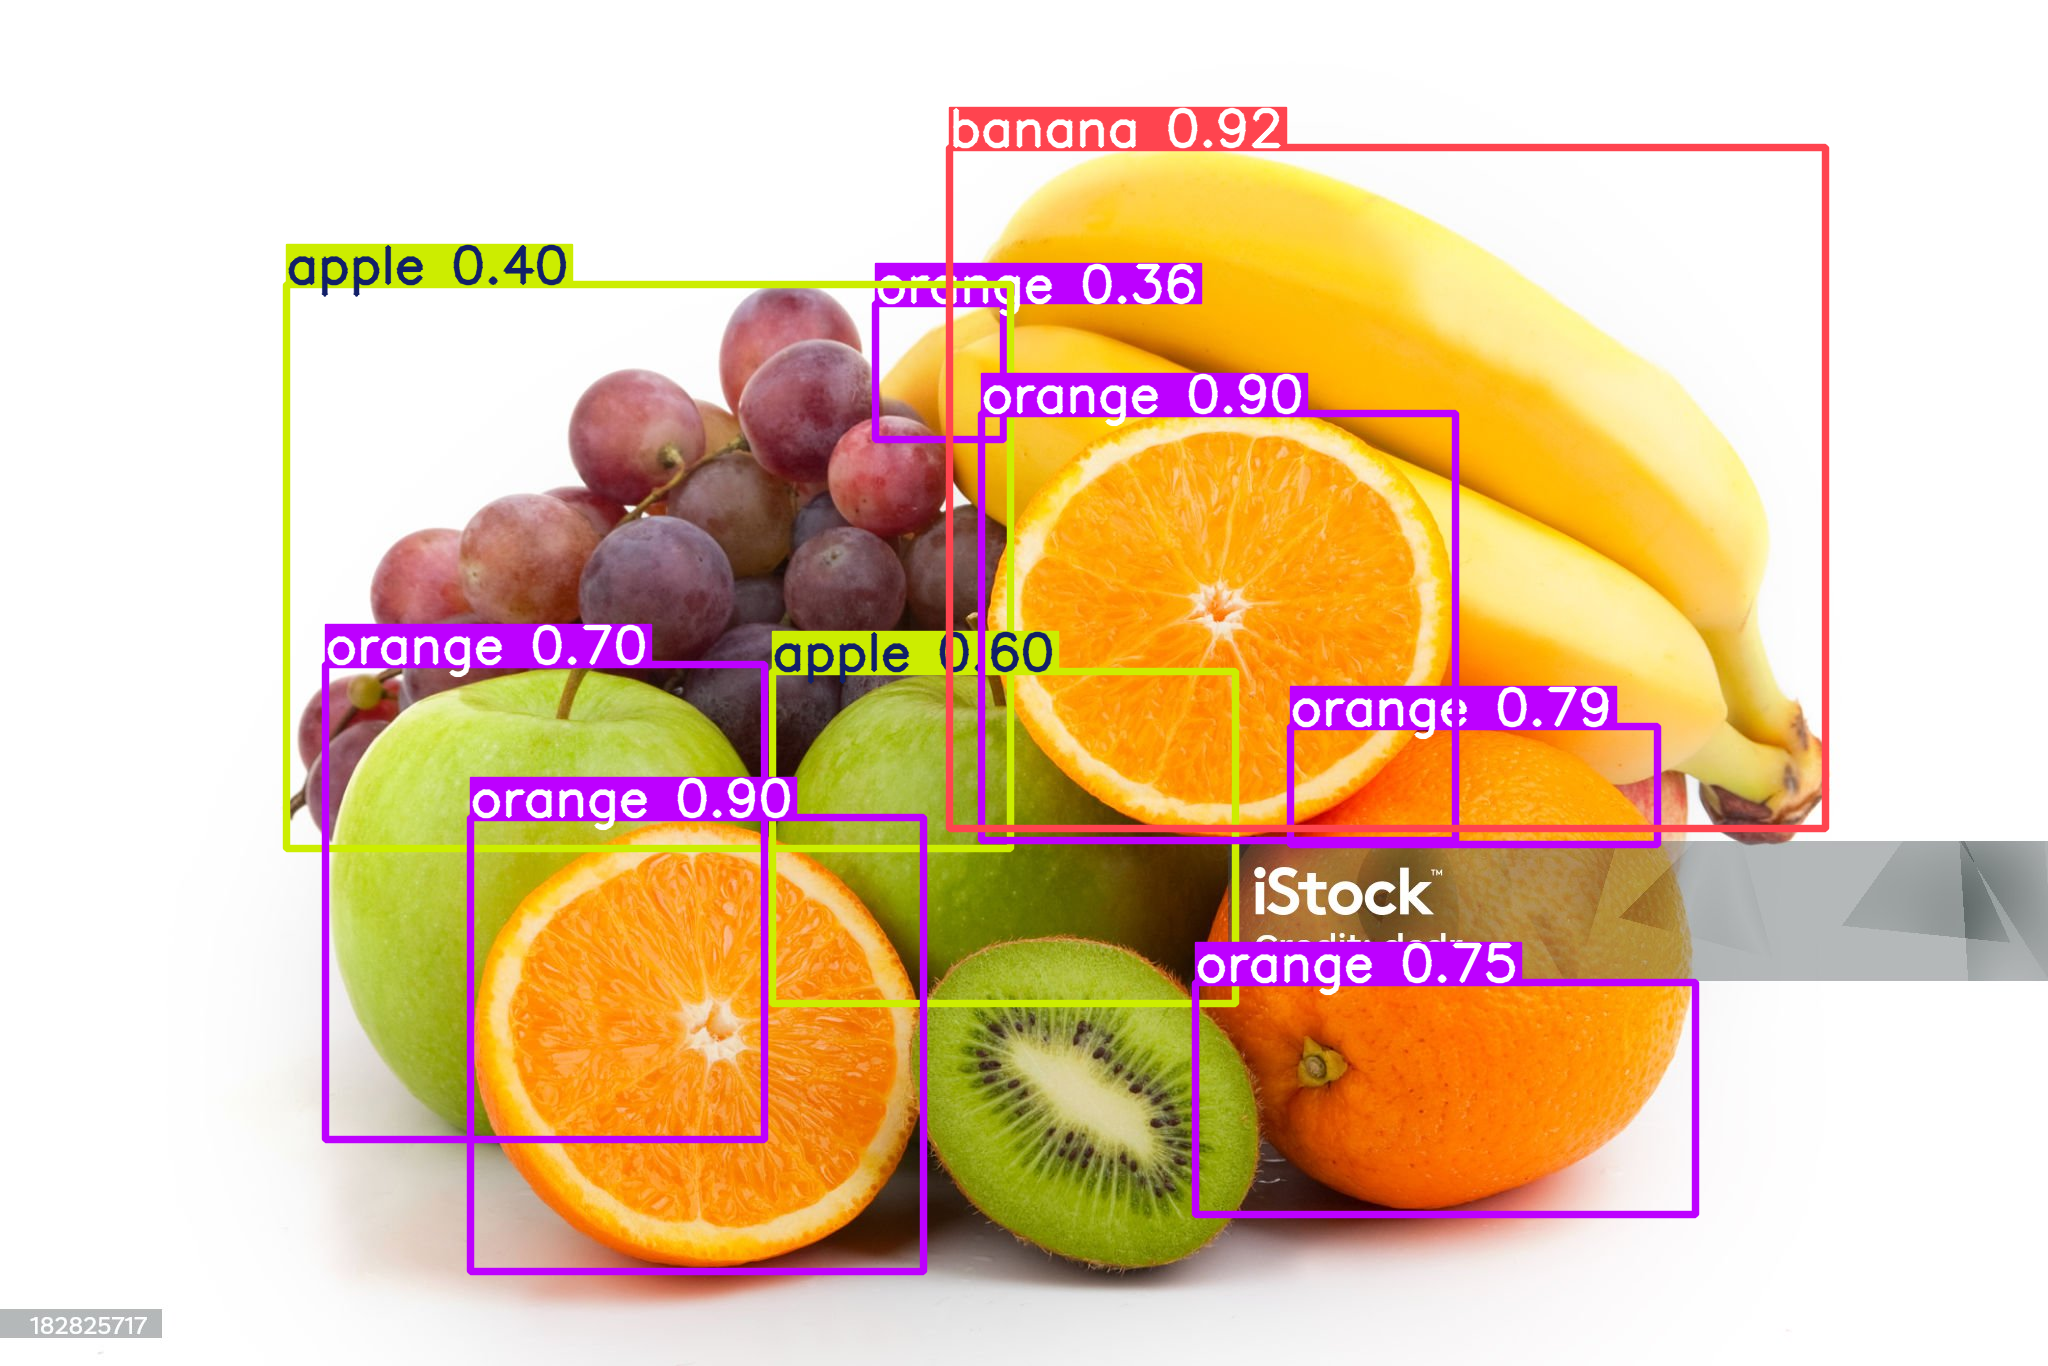

Detected Object Counts:
banana: 1
orange: 6
apple: 2


tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(



📝 Natural Language Description:



In [6]:
#  importing the libraries
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO("yolov8s.pt")

# Load  image
image_path = "istockphoto-18.jpg"
image = Image.open(image_path)

results = model(image_path)

# Display results (fixed)
results[0].show()

# Count detected objects
detected_objects = {}
for cls in results[0].boxes.cls:
    label = model.names[int(cls)]
    detected_objects[label] = detected_objects.get(label, 0) + 1

# Print detected objects
print("Detected Object Counts:")
for obj, count in detected_objects.items():
    print(f"{obj}: {count}")

# Format detections for LLM prompt
object_list = ", ".join([f"{v} {k}{'s' if v > 1 else ''}" for k, v in detected_objects.items()])
prompt = f"The image contains the following objects: {object_list}. Describe this scene in natural language."

from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Load TinyLlama model and tokenizer
model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype=torch.float16, device_map="auto")

# prompt
inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

# Generate response
output = model.generate(**inputs, max_new_tokens=100, temperature=0.7)
response = tokenizer.decode(output[0], skip_special_tokens=True)
description = response.replace(prompt, "").strip()

# Output
print("\n Natural Language Description:")
print(description)


**FINE TUNING**

Saving istockphoto-18.jpg to istockphoto-18 (2).jpg


100%|██████████| 6.25M/6.25M [00:00<00:00, 283MB/s]



image 1/1 /content/istockphoto-18 (2).jpg: 448x640 1 banana, 3 apples, 5 oranges, 55.5ms
Speed: 4.4ms preprocess, 55.5ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)

🎯 Detected Object Counts:
orange: 5
banana: 1
apple: 3


Glyph 127822 (\N{RED APPLE}) missing from font(s) DejaVu Sans.


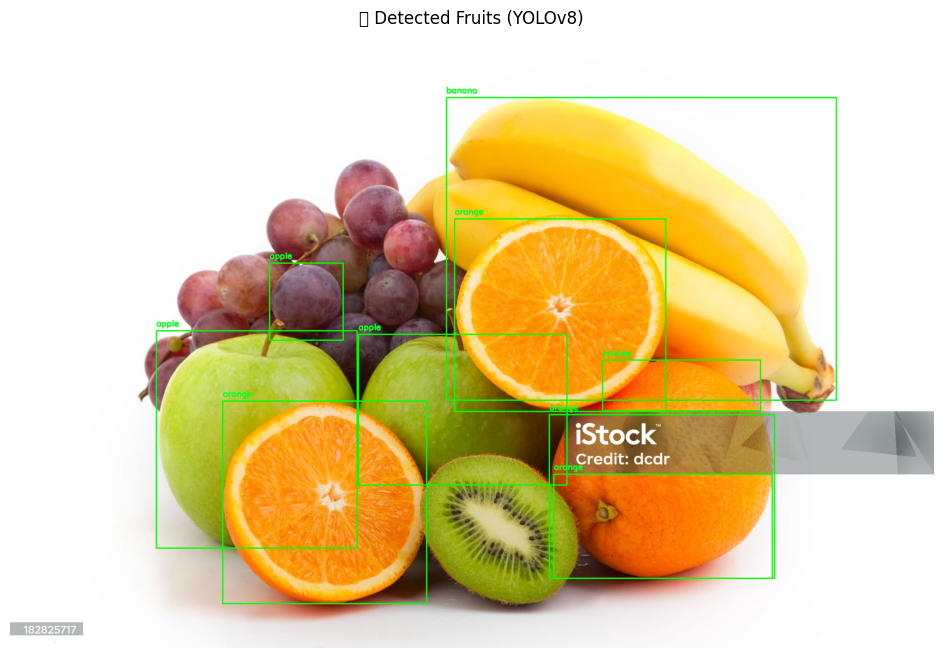

In [8]:
# STEP 1: Install Ultralytics
!pip install ultralytics --quiet

# STEP 2: Import required libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import os
from collections import Counter

# image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

#  Load YOLOv8 pre-trained model (coco dataset)
model = YOLO('yolov8n.pt')

# detection
results = model(image_path, conf=0.25)[0]
# results
names = model.names
detected_labels = [names[int(cls)] for cls in results.boxes.cls]
counts = Counter(detected_labels)

# counts
print("\n Detected Object Counts:")
for label, count in counts.items():
    print(f"{label}: {count}")

# Visualize with boxes
image = cv2.imread(image_path)
for box, cls in zip(results.boxes.xyxy, results.boxes.cls):
    x1, y1, x2, y2 = map(int, box)
    label = names[int(cls)]
    cv2.rectangle(image, (x1, y1), (x2, y2), (0,255,0), 2)
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (36,255,12), 2)

# show image
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(" Detected Fruits (YOLOv8)")
plt.show()
